# **AI Customer Review Intelligence System**

In [1]:
!pip install pandas textblob matplotlib google-play-scraper
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

# **Install Required Libraries**

In [2]:
from google_play_scraper import reviews
import pandas as pd

In [3]:
#Fetch Real Reviews
result, _ = reviews(
    'com.instagram.android',   # change app here
    lang='en',
    country='us',
    count=200
)

In [4]:
df = pd.DataFrame(result)
df = df[['content', 'score']]

In [5]:
df.columns = ['review', 'rating']

In [6]:
df.head(10)

,review,rating
0,I lost Instagram so much,5
1,grtk aap,5
2,very good,5
3,just made an account. got accused of being a b...,1
4,great app for content,5
5,super,5
6,I only use it because it's the platform you ca...,1
7,बेस्ट instagram,5
8,to good app,4
9,good 👍,5


# **Exploratory Data Analysis**

#### This section explores the distribution, patterns, and characteristics of real customer reviews.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  200 non-null    object
 1   rating  200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [8]:
df.describe()

,rating
count,200.000000
mean,3.955000
std,1.617422
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
df.isnull().sum()

review    0
rating    0
dtype: int64

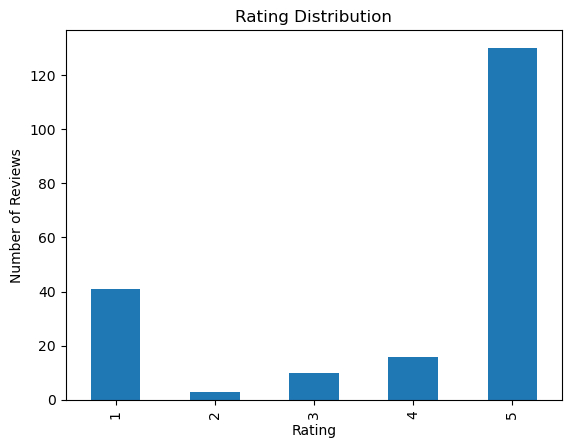

In [10]:
import matplotlib.pyplot as plt

df["rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [11]:
#Review Length Analysis
df["review_length"] = df["review"].apply(len)

df["review_length"].describe()

count    200.000000
mean      62.110000
std      113.486359
min        1.000000
25%        8.000000
50%       19.000000
75%       45.000000
max      500.000000
Name: review_length, dtype: float64

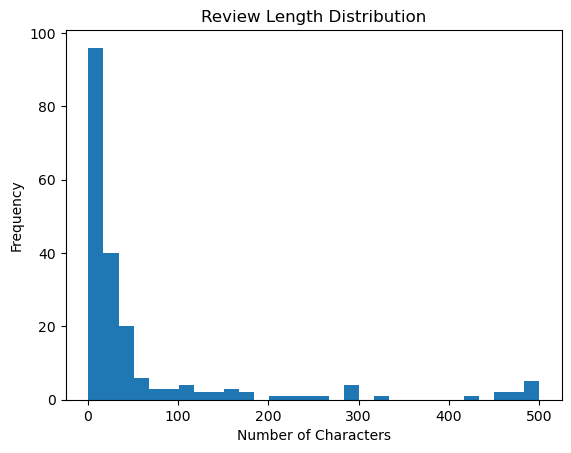

In [12]:
df["review_length"].plot(kind="hist", bins=30)
plt.title("Review Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

In [13]:
#Average Rating vs Review Length
df.groupby("rating")["review_length"].mean()

rating
1    128.243902
2    331.333333
3     49.900000
4     37.562500
5     39.000000
Name: review_length, dtype: float64

In [14]:
#Word Frequency
from collections import Counter
import re

In [15]:
all_text = " ".join(df["review"]).lower()
words = re.findall(r'\b[a-z]{3,}\b', all_text)

common_words = Counter(words).most_common(20)

common_words

[('the', 53),
 ('app', 51),
 ('and', 47),
 ('instagram', 31),
 ('good', 31),
 ('this', 31),
 ('account', 23),
 ('for', 22),
 ('you', 21),
 ('very', 17),
 ('but', 15),
 ('nice', 15),
 ('can', 14),
 ('have', 14),
 ('not', 13),
 ('love', 12),
 ('that', 12),
 ('like', 11),
 ('great', 10),
 ('please', 10)]

In [16]:
#Top Words in Negative Reviews Only
negative_reviews = df[df["rating"] <= 2]

neg_text = " ".join(negative_reviews["review"]).lower()
neg_words = re.findall(r'\b[a-z]{3,}\b', neg_text)

In [17]:
Counter(neg_words).most_common(20)

[('the', 28),
 ('and', 25),
 ('app', 20),
 ('account', 19),
 ('this', 13),
 ('you', 12),
 ('have', 12),
 ('instagram', 11),
 ('that', 10),
 ('but', 10),
 ('not', 10),
 ('they', 9),
 ('for', 9),
 ('don', 9),
 ('can', 8),
 ('people', 7),
 ('like', 7),
 ('use', 6),
 ('please', 6),
 ('get', 6)]

## **Text Preprocessing**

In [18]:
import string

In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)   # remove links
    text = re.sub(r'\d+', '', text)       # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

In [20]:
df["clean_review"] = df["review"].apply(clean_text)

In [21]:
df[["review", "clean_review"]].head(10)

,review,clean_review
0,I lost Instagram so much,i lost instagram so much
1,grtk aap,grtk aap
2,very good,very good
3,just made an account. got accused of being a b...,just made an account got accused of being a bo...
4,great app for content,great app for content
5,super,super
6,I only use it because it's the platform you ca...,i only use it because its the platform you can...
7,बेस्ट instagram,बेस्ट instagram
8,to good app,to good app
9,good 👍,good 👍


In [22]:
def fix_negations(text):
    text = text.replace("not bad", "good")
    text = text.replace("not good", "bad")
    text = text.replace("dont like", "dislike")
    text = text.replace("not working", "broken")
    text = text.replace("not responding", "unresponsive")
    return text

df["clean_review"] = df["clean_review"].apply(fix_negations)

df[["review", "clean_review"]].head(10)

,review,clean_review
0,I lost Instagram so much,i lost instagram so much
1,grtk aap,grtk aap
2,very good,very good
3,just made an account. got accused of being a b...,just made an account got accused of being a bo...
4,great app for content,great app for content
5,super,super
6,I only use it because it's the platform you ca...,i only use it because its the platform you can...
7,बेस्ट instagram,बेस्ट instagram
8,to good app,to good app
9,good 👍,good 👍


### Stopword Removal + Tokenization

In [23]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\sakur\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\sakur\AppData\Roaming\nltk_data...
[

True

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered = [w for w in words if w not in stop_words]
    return " ".join(filtered)

df["processed_review"] = df["clean_review"].apply(remove_stopwords)

df[["clean_review", "processed_review"]].head()

,clean_review,processed_review
0,i lost instagram so much,lost instagram much
1,grtk aap,grtk aap
2,very good,good
3,just made an account got accused of being a bo...,made account got accused bot within days using...
4,great app for content,great app content


In [25]:
df["processed_review"] = df["clean_review"].apply(remove_stopwords)

In [26]:
df[["clean_review", "processed_review"]].head(10)

,clean_review,processed_review
0,i lost instagram so much,lost instagram much
1,grtk aap,grtk aap
2,very good,good
3,just made an account got accused of being a bo...,made account got accused bot within days using...
4,great app for content,great app content
5,super,super
6,i only use it because its the platform you can...,use platform find people
7,बेस्ट instagram,बेस्ट instagram
8,to good app,good app
9,good 👍,good 👍


# **Sentiment Analysis**

In [27]:
!pip install transformers torch --upgrade

In [28]:
!pip install sentencepiece
!pip install protobuf
!pip install tiktoken

In [29]:
from transformers import pipeline

sentiment_model = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

def ai_sentiment(text):
    result = sentiment_model(text[:512])[0]
    
    if result["label"] == "POSITIVE":
        return "Positive"
    else:
        return "Negative"

df["Sentiment"] = df["review"].apply(ai_sentiment)

df[["review", "Sentiment"]].head()

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

,review,Sentiment
0,I lost Instagram so much,Negative
1,grtk aap,Negative
2,very good,Positive
3,just made an account. got accused of being a b...,Negative
4,great app for content,Positive


In [30]:
df["Negative_Flag"] = df["rating"].apply(lambda x: 1 if x <= 2 else 0)

In [31]:
df[["review", "rating", "Negative_Flag"]].head(10)

,review,rating,Negative_Flag
0,I lost Instagram so much,5,0
1,grtk aap,5,0
2,very good,5,0
3,just made an account. got accused of being a b...,1,1
4,great app for content,5,0
5,super,5,0
6,I only use it because it's the platform you ca...,1,1
7,बेस्ट instagram,5,0
8,to good app,4,0
9,good 👍,5,0


In [32]:
df["Negative_Flag"].value_counts()

Negative_Flag
0    156
1     44
Name: count, dtype: int64

In [33]:
pd.crosstab(df["Negative_Flag"], df["rating"])

rating,1,2,3,4,5
Negative_Flag,,,,,
0,0,0,10,16,130
1,41,3,0,0,0


In [34]:
pd.crosstab(df["Sentiment"], df["Negative_Flag"])

Negative_Flag,0,1
Sentiment,,
Negative,36,42
Positive,120,2


In [35]:
from sklearn.metrics import classification_report

# Convert Sentiment to binary
df["Predicted_Flag"] = df["Sentiment"].apply(lambda x: 1 if x=="Negative" else 0)

print(classification_report(df["Negative_Flag"], df["Predicted_Flag"]))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       156
           1       0.54      0.95      0.69        44

    accuracy                           0.81       200
   macro avg       0.76      0.86      0.78       200
weighted avg       0.89      0.81      0.82       200



# **Complaint Type Classification**

In [36]:
from collections import Counter

negative_reviews = df[df["Sentiment"]=="Negative"]["processed_review"]

all_words = []

for review in negative_reviews:
    words = review.split()
    all_words.extend(words)

Counter(all_words).most_common(30)

[('app', 23),
 ('account', 22),
 ('instagram', 21),
 ('dont', 9),
 ('h', 8),
 ('like', 8),
 ('get', 8),
 ('people', 7),
 ('please', 7),
 ('use', 6),
 ('add', 6),
 ('posts', 6),
 ('ho', 5),
 ('update', 5),
 ('option', 5),
 ('even', 5),
 ('yet', 5),
 ('want', 5),
 ('rahe', 4),
 ('hai', 4),
 ('id', 4),
 ('many', 4),
 ('problem', 4),
 ('every', 4),
 ('see', 4),
 ('suspended', 4),
 ('anything', 4),
 ('still', 4),
 ('issue', 4),
 ('original', 4)]

In [37]:
def detect_complaint_type(row):
    text = row["review"].lower()
    
    if row["Sentiment"] != "Negative":
        return "No Complaint"
    
    if any(word in text for word in ["account", "ban", "suspension", "disabled", "cant login"]):
        return "Account Access Issue"
    
    elif any(word in text for word in ["reels", "followers", "view", "download", "upload", "post", "not showing"]):
        return "Feature Issue"
    
    elif any(word in text for word in ["slow", "lag", "crash", "error", "stuck", "freeze"]):
        return "Technical Performance Issue"
    
    elif any(word in text for word in ["issue", "problem", "not working", "facing"]):
        return "General Problem"
    
    else:
        return "Other Complaint"

In [38]:
df["Complaint Type"] = df.apply(detect_complaint_type, axis=1)
df["Complaint Type"].value_counts()

Complaint Type
No Complaint            122
Other Complaint          47
Account Access Issue     19
Feature Issue             6
General Problem           6
Name: count, dtype: int64

In [39]:
df[df["Complaint Type"]=="Other Complaint"][["review"]].head(15)

,review
0,I lost Instagram so much
1,grtk aap
6,I only use it because it's the platform you ca...
7,बेस्ट instagram
12,💎
29,too much addiction
33,😘😘😘😘😘
43,Godd App I am chill on this app
46,Mera pura jindagi jhand kar diya Instagram ne
48,Very bad app.Girls always block me whenever I ...


In [40]:
df[df["Complaint Type"]=="Other Complaint"]["review"].sample(10)

29                                    too much addiction
173                       عالی یه برنامه فوق العاده مرسی
6      I only use it because it's the platform you ca...
161    🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳...
85                   get a gf and you will get broken up
62                                                     😍
194                   nah aya hota tu toh acha hota bhai
192                                                   ❤️
131                                           ❤️❤️❤️❤️❤️
76                                                 Sorry
Name: review, dtype: object

# Updated Complaint Detection

In [41]:
def detect_complaint_type(row):
    text = row["review"].lower()
    
    if row["Sentiment"] != "Negative":
        return "No Complaint"
    
    if any(word in text for word in ["account", "ban", "suspension", "disabled", "cant login"]):
        return "Account Access Issue"
    
    elif any(word in text for word in ["reels", "followers", "view", "download", "upload", "post", "not showing"]):
        return "Feature Issue"
    
    elif any(word in text for word in ["slow", "lag", "crash", "error", "stuck", "freeze"]):
        return "Technical Performance Issue"
    
    elif any(word in text for word in ["please add", "add feature", "need option", "suggestion"]):
        return "Feature Request"
    
    elif any(word in text for word in ["notification", "msg", "message not", "otp"]):
        return "Notification Issue"
    
    elif any(word in text for word in ["reach", "following", "fake", "algorithm"]):
        return "Platform/Algorithm Issue"
    
    elif any(word in text for word in ["toxic", "hate", "abuse"]):
        return "Community Issue"
    
    elif any(word in text for word in ["worst", "useless", "disgusting", "waste", "bad experience", "hate"]):
        return "Emotional Dissatisfaction"
    
    else:
        return  "Unstructured Negative Feedback"

In [42]:
df["Complaint Type"] = df.apply(detect_complaint_type, axis=1)
df["Complaint Type"].value_counts()

Complaint Type
No Complaint                      122
Unstructured Negative Feedback     48
Account Access Issue               19
Feature Issue                       6
Emotional Dissatisfaction           2
Notification Issue                  2
Community Issue                     1
Name: count, dtype: int64

## Severity Score

In [45]:
def severity_score(row):
    text = str(row["review"]).lower()
    
    if row["Sentiment"] != "Negative":
        return 0   # No issue
    
    # Critical keywords
    if any(word in text for word in [
        "worst", "useless", "refund", "ban", "suspension",
        "hacked", "data leak", "privacy"
    ]):
        return 3   # Critical
    
    # Moderate keywords
    elif any(word in text for word in [
        "slow", "lag", "issue", "problem", "not working",
        "cant", "error", "failed"
    ]):
        return 2   # Moderate
    
    else:
        return 1   # Minor complaint


In [46]:
df["Severity"] = df.apply(severity_score, axis=1)

# Define severity label function
def severity_label(x):
    if x == 3:
        return "Critical"
    elif x == 2:
        return "Moderate"
    elif x == 1:
        return "Minor"
    else:
        return "No Issue"

In [47]:
df["Severity Label"] = df["Severity"].apply(severity_label)

In [48]:
df[["Severity", "Severity Label"]].head()

,Severity,Severity Label
0,1,Minor
1,1,Minor
2,0,No Issue
3,1,Minor
4,0,No Issue


In [51]:
df["Severity Label"] = df["Severity"].apply(severity_label)

df[["review", "Sentiment", "Severity", "Severity Label"]].head(10)

,review,Sentiment,Severity,Severity Label
0,I lost Instagram so much,Negative,1,Minor
1,grtk aap,Negative,1,Minor
2,very good,Positive,0,No Issue
3,just made an account. got accused of being a b...,Negative,1,Minor
4,great app for content,Positive,0,No Issue
5,super,Positive,0,No Issue
6,I only use it because it's the platform you ca...,Negative,1,Minor
7,बेस्ट instagram,Negative,1,Minor
8,to good app,Positive,0,No Issue
9,good 👍,Positive,0,No Issue


In [52]:
print(df.columns)

Index(['review', 'rating', 'review_length', 'clean_review', 'processed_review',
       'Sentiment', 'Negative_Flag', 'Predicted_Flag', 'Complaint Type',
       'Severity', 'Severity Label'],
      dtype='object')


In [53]:
df["Severity"].value_counts()

Severity
0    122
1     64
3      7
2      7
Name: count, dtype: int64

# **Resolution Recommendation**

#### Automatically suggests action plans based on complaint type and severity.

In [54]:
def suggest_action(row):
    
    action_map = {
        "Account Access Issue": "Escalate to Account Security Team for verification.",
        "Feature Issue": "Forward to Product Team for feature review.",
        "Technical Performance Issue": "Escalate to Engineering Team for debugging.",
        "Notification Issue": "Check push notification service and server logs.",
        "Platform/Algorithm Issue": "Review algorithm behavior and content visibility rules.",
        "Feature Request": "Add to Product Roadmap discussion.",
        "General Problem": "Forward to Support Team for investigation.",
        "Other Complaint": "Manual review required."
    }
    
    base_action = action_map.get(row["Complaint Type"], "Manual review required.")
    
    # Add priority based on severity
    if row["Severity"] == 3:
        return "CRITICAL - Immediate Action: " + base_action
    elif row["Severity"] == 2:
        return "HIGH PRIORITY: " + base_action
    elif row["Severity"] == 1:
        return "NORMAL PRIORITY: " + base_action
    else:
        return "No Action Needed"

In [55]:
df["Suggested Action"] = df.apply(suggest_action, axis=1)

df[["review", "Complaint Type", "Severity Label", "Suggested Action"]].head(10)

,review,Complaint Type,Severity Label,Suggested Action
0,I lost Instagram so much,Unstructured Negative Feedback,Minor,NORMAL PRIORITY: Manual review required.
1,grtk aap,Unstructured Negative Feedback,Minor,NORMAL PRIORITY: Manual review required.
2,very good,No Complaint,No Issue,No Action Needed
3,just made an account. got accused of being a b...,Account Access Issue,Minor,NORMAL PRIORITY: Escalate to Account Security ...
4,great app for content,No Complaint,No Issue,No Action Needed
5,super,No Complaint,No Issue,No Action Needed
6,I only use it because it's the platform you ca...,Unstructured Negative Feedback,Minor,NORMAL PRIORITY: Manual review required.
7,बेस्ट instagram,Unstructured Negative Feedback,Minor,NORMAL PRIORITY: Manual review required.
8,to good app,No Complaint,No Issue,No Action Needed
9,good 👍,No Complaint,No Issue,No Action Needed


In [60]:
print("========== EXECUTIVE SUMMARY ==========\n")

print("Total Reviews:", len(df))
print("Positive Reviews:", (df["Sentiment"]=="Positive").sum())
print("Negative Reviews:", (df["Sentiment"]=="Negative").sum())
print("Critical Complaints:", (df["Severity"]==3).sum())
print("Moderate Complaints:", (df["Severity"]==2).sum())

print("\nTop Complaint Categories:")
print(df["Complaint Type"].value_counts().head())

========== EXECUTIVE SUMMARY ==========

Total Reviews: 200
Positive Reviews: 122
Negative Reviews: 78
Critical Complaints: 7
Moderate Complaints: 7

Top Complaint Categories:
Complaint Type
No Complaint                      122
Unstructured Negative Feedback     48
Account Access Issue               19
Feature Issue                       6
Emotional Dissatisfaction           2
Name: count, dtype: int64


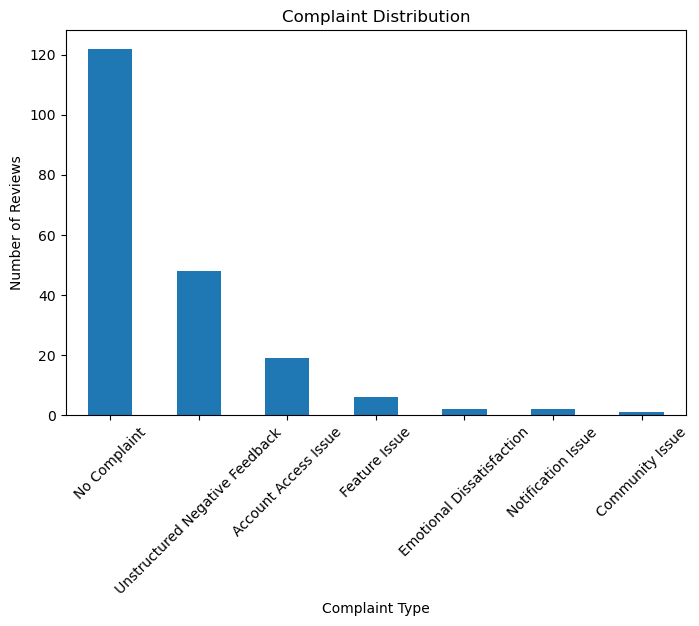

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df["Complaint Type"].value_counts().plot(kind="bar")
plt.title("Complaint Distribution")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

In [64]:
df["Predicted_Flag"] = df["Sentiment"].apply(lambda x: 1 if x=="Negative" else 0)

print(classification_report(df["Negative_Flag"], df["Predicted_Flag"]))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       156
           1       0.54      0.95      0.69        44

    accuracy                           0.81       200
   macro avg       0.76      0.86      0.78       200
weighted avg       0.89      0.81      0.82       200



In [65]:
df.to_csv("AI_Review_Analysis_Report.csv", index=False)